## Step 1 :

**Import Basix Scikit Learn Libraries for Data Manipulation as well Data Visualization.**

In [2]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

# import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Warnings
import warnings
warnings.filterwarnings("ignore")

# Import Data Logging Libraries
import logging
logging.basicConfig(level=logging.INFO,
                    filename="model.log",
                    filemode="w",
                    format="%(asctime)s - %(levelname)s - %(message)s"
                    )

## Step 2 :

**Data Uploading Using Pandas Function**

In [3]:
# Load the Dataset

url = "https://raw.githubusercontent.com/Digraskarpratik/CementCompositeStrength_PredicationModel/refs/heads/main/concrete_data.csv"

df = pd.read_csv(url,sep= ",")

df.sample(frac = 1)


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
530,359.0,19.0,141.0,154.0,10.9,942.0,801.0,56,66.78
481,446.0,24.0,79.0,162.0,11.6,967.0,712.0,56,61.07
909,146.0,173.0,0.0,182.0,3.0,986.0,817.0,28,23.74
131,379.5,151.2,0.0,153.9,15.9,1134.3,605.0,28,52.20
501,491.0,26.0,123.0,210.0,3.9,882.0,699.0,3,25.61
...,...,...,...,...,...,...,...,...,...
242,229.7,0.0,118.2,195.2,6.1,1028.1,757.6,56,31.35
863,288.0,121.0,0.0,177.0,7.0,908.0,829.0,28,42.13
335,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,14,38.77
723,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,28,27.83


The Category of This Data is Numeric in Nature.

## Step 3  :
**Doing Exporatory Data Analysis [EDA] :-->**

1. Univariate Analysis

2. Bi Variate Analysis

In [4]:
# Perform Univariate Analysis
from collections import OrderedDict

stats =  [] 

for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Type': df[i].dtype,
        'Missing': df[i].isnull().sum(),
        'Unique': df[i].nunique(),
        'Mode': df[i].mode().values[0],
        'Mean': df[i].mean(),
        'Median': df[i].median(),
        'Standard Deviation': df[i].std(),
        'Min': df[i].min(),
        'Max': df[i].max(),
        'Range': df[i].max() - df[i].min(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurt(),
        'IQR' : df[i].quantile(0.75) - df[i].quantile(0.25)
    })
    
    stats.append(numerical_stats)

df_stats = pd.DataFrame(stats)

df_stats.style.background_gradient(subset= ["Missing", "Unique", "Mode", "Mean", "Median", "Standard Deviation", "Min", "Max", "Range", "Skewness", "Kurtosis", "IQR"], cmap = "Reds")    


,Feature,Type,Missing,Unique,Mode,Mean,Median,Standard Deviation,Min,Max,Range,Skewness,Kurtosis,IQR
0,cement,float64,0,278,362.600000,281.167864,272.900000,104.506364,102.000000,540.000000,438.000000,0.509481,-0.520652,157.625000
1,blast_furnace_slag,float64,0,185,0.000000,73.895825,22.000000,86.279342,0.000000,359.400000,359.400000,0.800717,-0.508175,142.950000
2,fly_ash,float64,0,156,0.000000,54.188350,0.000000,63.997004,0.000000,200.100000,200.100000,0.537354,-1.328746,118.300000
3,water,float64,0,195,192.000000,181.567282,185.000000,21.354219,121.800000,247.000000,125.200000,0.074628,0.122082,27.100000
4,superplasticizer,float64,0,111,0.000000,6.204660,6.400000,5.973841,0.000000,32.200000,32.200000,0.907203,1.411269,10.200000
5,coarse_aggregate,float64,0,284,932.000000,972.918932,968.000000,77.753954,801.000000,1145.000000,344.000000,-0.040220,-0.599016,97.400000
6,fine_aggregate,float64,0,302,594.000000,773.580485,779.500000,80.175980,594.000000,992.600000,398.600000,-0.253010,-0.102177,93.050000
7,age,int64,0,14,28.000000,45.662136,28.000000,63.169912,1.000000,365.000000,364.000000,3.269177,12.168989,49.000000
8,concrete_compressive_strength,float64,0,845,33.400000,35.817961,34.445000,16.705742,2.330000,82.600000,80.270000,0.416977,-0.313725,22.425000


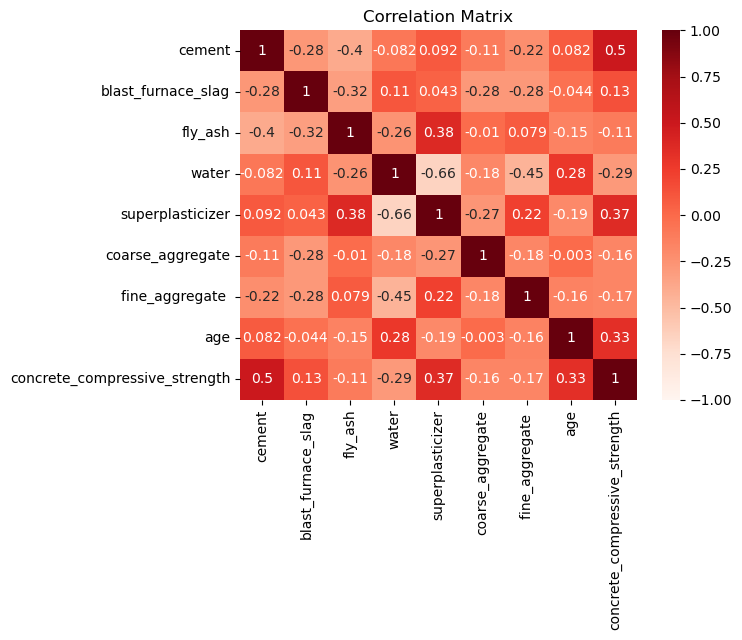

In [5]:
# Checking Correlation Matrix
# X = Independent Variables
# y =  Dependent Variable ---> ['concrete_compressive_strength']
# annot is for Displaying Numbers inside cell
sns.heatmap(df.corr(),annot=True, yticklabels=True,center= 0,vmax=1, vmin= -1 , cmap = "Reds")
plt.title("Correlation Matrix")
plt.show()
# X = df.drop('concrete_compressive_strength', axis = 1 )


In [6]:
# Understanding Features and Creare New Feature Based on Exisiting Feature --> Feature Engineering

df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Name: concrete_compressive_strength, dtype: float64

# **Feature Engineering:**

In [7]:
df['Composite_Ratio'] = 1/(df['cement'] + df['superplasticizer'] + df['blast_furnace_slag']) / (df['water'])

In [8]:
df["cement_to_water_ratio"] = 1/(df["cement"] / df["water"])

In [9]:
df.corr()["concrete_compressive_strength"]

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Composite_Ratio                 -0.373830
cement_to_water_ratio           -0.500692
Name: concrete_compressive_strength, dtype: float64

In [10]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,Composite_Ratio,cement_to_water_ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.000011,0.300000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.000011,0.300000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.000009,0.685714
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.000009,0.685714
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.000016,0.966767
...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,0.000014,0.649783
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,0.000015,0.608318
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,0.000018,1.297643
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,0.000016,1.103708


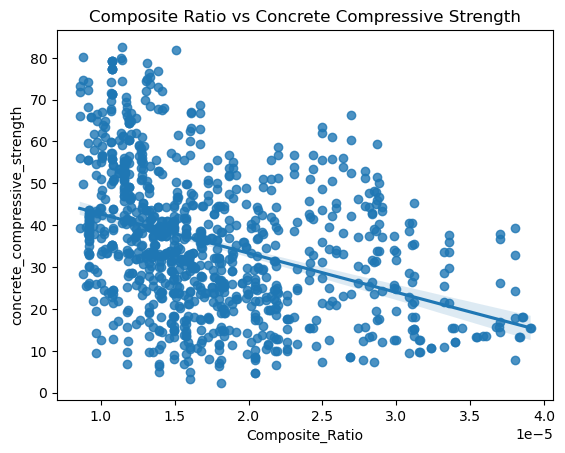

In [11]:
sns.regplot(x = df["Composite_Ratio"], y = df["concrete_compressive_strength"])
plt.title("Composite Ratio vs Concrete Compressive Strength")
plt.show()

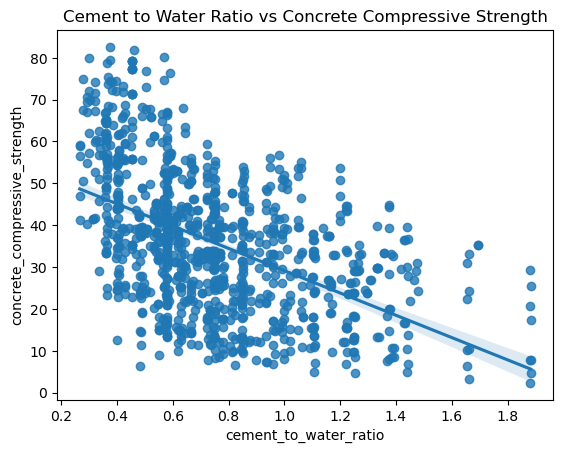

In [12]:
sns.regplot(x = df["cement_to_water_ratio"] , y = df ["concrete_compressive_strength"])
plt.title("Cement to Water Ratio vs Concrete Compressive Strength")
plt.show()

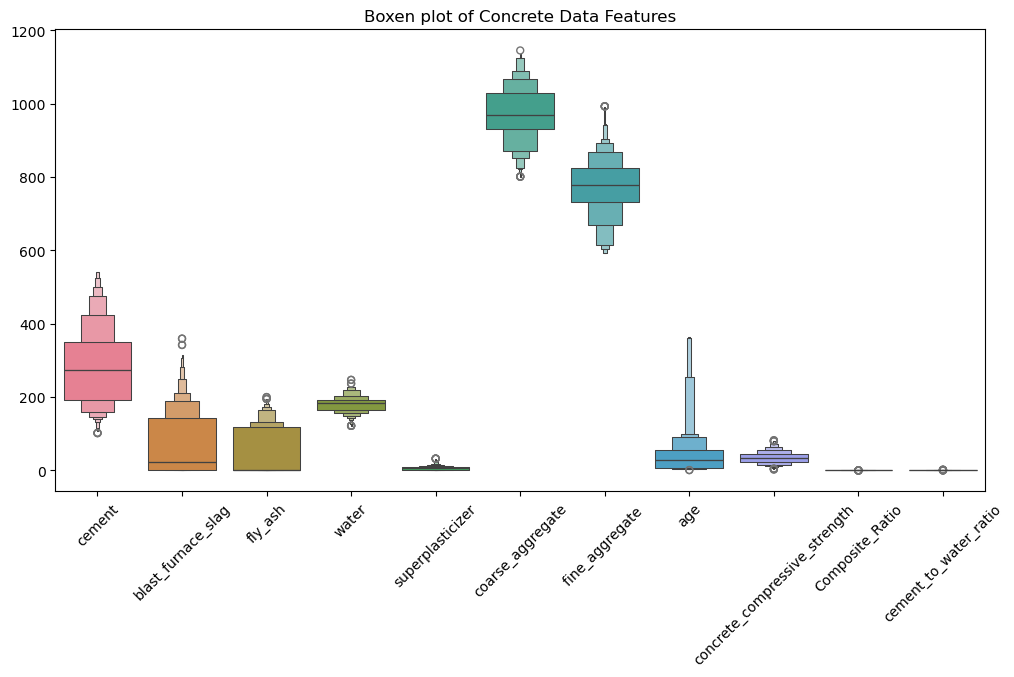

In [13]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxen plot of Concrete Data Features" )
plt.show()

In [14]:
# Use Variance Inflation Factor (VIF) to Check for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns=['concrete_compressive_strength'])  # All independent variables
X =  X.assign(constant=1)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the constant column from the result
vif_data = vif_data[vif_data['Feature'] != 'constant']

# Display VIF values
print(vif_data)

                 Feature        VIF
0                 cement  16.845428
1     blast_furnace_slag  11.328921
2                fly_ash   6.232357
3                  water   9.040867
4       superplasticizer   2.968025
5       coarse_aggregate   5.098293
6        fine_aggregate    7.034744
7                    age   1.135259
8        Composite_Ratio   9.827568
9  cement_to_water_ratio   6.959252


## **Data Insights:**

1. Higher Value of VIF Suggest Multi Colinearity. [VIG > 10] ---> Column Shows Multi Collinearity.

2. Such Columns Must be Removed before Applying Regression Model.

## Step 4 :
Splitting the Data into Training set and Testing set Also Using Train and Test Split to Prevent Data Leakage

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="concrete_compressive_strength", axis=1)
y = df["concrete_compressive_strength"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)


In [16]:
# Using Scaling Technique

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2_score_LR = r2_score(y_test, y_pred_LR)

r2_score_LR

0.6058950475913112

In [18]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

y_pred_DT =  DT.predict(X_test)
r2_score_DT = r2_score(y_test, y_pred_DT)

print(f'The R2 Score for Decision :- {r2_score_DT * 100}%')


The R2 Score for Decision :- 82.25897990785187%


In [19]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X_train, y_train)

y_pred_RF = RF.predict(X_test)

r2_score_RF = r2_score(y_test, y_pred_RF)

print(f'The R2 Score for Random Forest Regressor :- {r2_score_RF * 100}%')

The R2 Score for Random Forest Regressor :- 89.75363741116247%


In [20]:
# Checking Model Performance

mse_LR = mean_squared_error(y_test, y_pred_LR)
mse_DT = mean_squared_error(y_test, y_pred_DT)

mae_LR = mean_absolute_error(y_test, y_pred_LR)
mae_DT = mean_absolute_error(y_test, y_pred_DT)

print(f'The Mean Squared Error for Linear Regression Model :- {mse_LR}')

print(f'The Mean Squared Error for Decison Tree Model :- {mse_DT}')

print(f'The Mean Absolute Error for Linear Regression Model :- {mae_LR}')

print(f'The Mean Absolute Error for Decison Tree Model :- {mae_DT}')


The Mean Squared Error for Linear Regression Model :- 106.63465834982154
The Mean Squared Error for Decison Tree Model :- 48.00263495145631
The Mean Absolute Error for Linear Regression Model :- 8.170411178186539
The Mean Absolute Error for Decison Tree Model :- 4.446084142394822


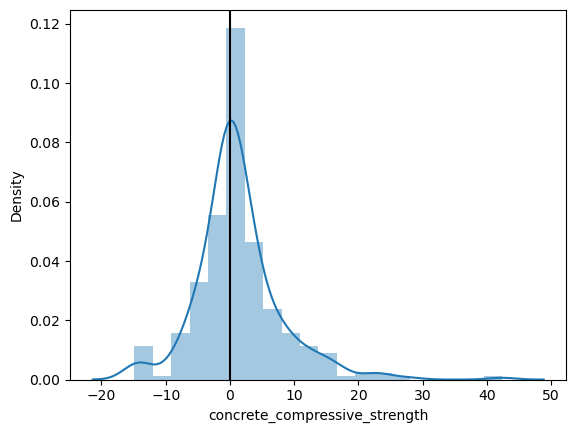

In [21]:
# For Decison Tree Model

sns.distplot(y_test - y_pred_DT, bins = 20)
plt.axvline(0, color = "k")

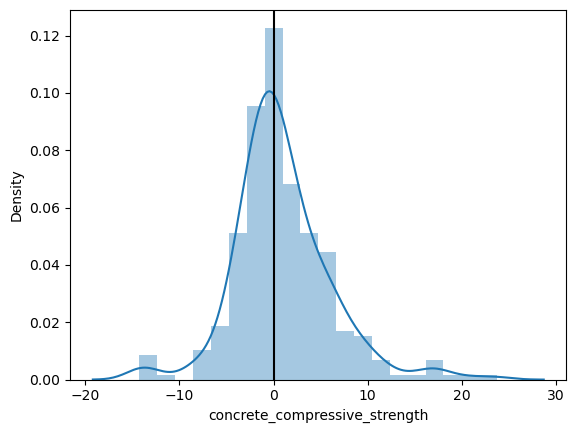

In [22]:
# for Random Forest Regressor Model
sns.distplot(y_test - y_pred_RF, bins = 20)
plt.axvline(0, color = "k")

In [23]:
# Using Boosting Algorithm
import xgboost as xgb

xgb = xgb.XGBRegressor()

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

r2_score_xgb = r2_score(y_test, y_pred_xgb)

print(f'The R2 Score for XGBoost :- {r2_score_xgb * 100}%')


The R2 Score for XGBoost :- 92.0547581740837%


In [24]:
# using adaboost algorithm
from sklearn.ensemble import AdaBoostRegressor

ADA = AdaBoostRegressor()

ADA.fit(X_train, y_train)
y_pred_ADA = ADA.predict(X_test)

r2_score_ADA = r2_score(y_test, y_pred_ADA)

print(f'The R2 Score for AdaBoost :- {r2_score_ADA * 100}%')

The R2 Score for AdaBoost :- 79.17919757862207%


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# define model and parameter grid
model = RandomForestRegressor(random_state=42)
param_grid = {"n_estimators": [25,50,100, 200, 300, 500], "max_depth": [None, 5, 10, 15, 20]}

# define grid search
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# best Model
best_model =grid_search.best_estimator_
y_pred=best_model.predict(X_test)

# Print result
print(f"Best Parameters: {grid_search.best_params_}")
print(f'The R2 Score for Random Forest Regressor with Grid Search :- {r2_score(y_test, y_pred) * 100}%')

Best Parameters: {'max_depth': 20, 'n_estimators': 500}
The R2 Score for Random Forest Regressor with Grid Search :- 90.1046210143722%
